# This tutorial shows how to make a cross spectrum of two light curves using Stingray.

In [33]:
import numpy as np
from stingray import Lightcurve, Crossspectrum

import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
%matplotlib inline
font_prop = font_manager.FontProperties(size=18)

# Cross spectrum example
## 1. Create two light curves
There are two ways to make Lightcurve objects. We'll show one way here. Check out "Lightcurve/Lightcurve\ tutorial.ipynb" for more examples.

Generate an array of relative timestamps that's 8 seconds long, with dt = 0.0625 s, and make two signals in units of counts. The first is a sine wave with amplitude = 300 cts, frequency = 2 Hz, phase offset = 0 radians, and mean = 1000 cts. The second is a sine wave with amplitude = 200 cts, frequency = 2 Hz, phase offset = pi/4 radians, and mean = 900 cts. We then add Poisson noise to the light curves.

In [72]:
dt = 0.3125  # seconds
exposure = 8.  # seconds
times = np.arange(0,8,0.03125)  # seconds

signal_1 = 300 * np.sin(2.*np.pi*times/0.5) + 1000
signal_2 = 200 * np.sin(2.*np.pi*times/0.5 + np.pi/4) + 900
noisy_1 = np.random.poisson(signal_1)
noisy_2 = np.random.poisson(signal_2)

Now let's turn noisy_1 and noisy_2 into Lightcurve objects.

In [73]:
lc1 = Lightcurve(times, noisy_1)
lc2 = Lightcurve(times, noisy_2)

Here we're plotting them to see what they look like.

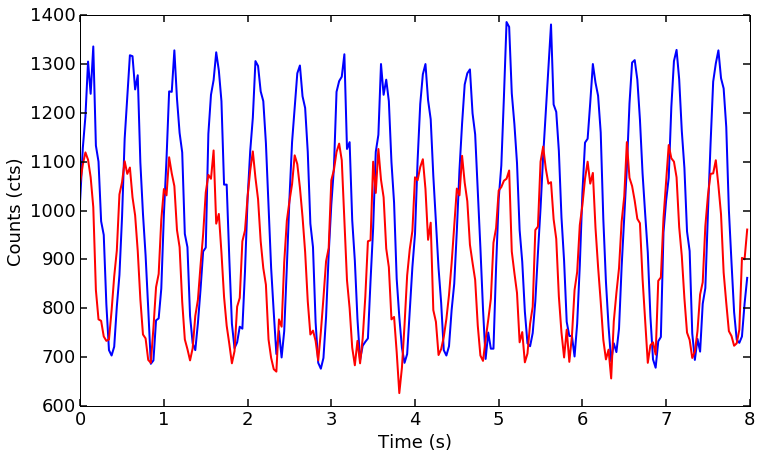

In [74]:
fig, ax = plt.subplots(1,1,figsize=(12,7))
ax.plot(lc1.time, lc1.counts, lw=2, color='blue')
ax.plot(lc1.time, lc2.counts, lw=2, color='red')
# ax.set_ylim(650, 1350)
ax.set_xlabel("Time (s)", fontproperties=font_prop)
ax.set_ylabel("Counts (cts)", fontproperties=font_prop)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.tick_params(which='major', width=1.5, length=7)
ax.tick_params(which='minor', width=1.5, length=4)
plt.show()

## 2. Now pass both of the light curves to the Crossspectrum class to create a Crossspectrum object.

In [75]:
cs = Crossspectrum(lc1, lc2)
print(cs)

We can print the arrays of the positive Fourier frequencies and the cross power. The cross power has a real and an imaginary component.

In [77]:
print(cs.freq)
print(cs.power)

[  0.125   0.25    0.375   0.5     0.625   0.75    0.875   1.      1.125
   1.25    1.375   1.5     1.625   1.75    1.875   2.      2.125   2.25
   2.375   2.5     2.625   2.75    2.875   3.      3.125   3.25    3.375
   3.5     3.625   3.75    3.875   4.      4.125   4.25    4.375   4.5
   4.625   4.75    4.875   5.      5.125   5.25    5.375   5.5     5.625
   5.75    5.875   6.      6.125   6.25    6.375   6.5     6.625   6.75
   6.875   7.      7.125   7.25    7.375   7.5     7.625   7.75    7.875
   8.      8.125   8.25    8.375   8.5     8.625   8.75    8.875   9.
   9.125   9.25    9.375   9.5     9.625   9.75    9.875  10.     10.125
  10.25   10.375  10.5    10.625  10.75   10.875  11.     11.125  11.25
  11.375  11.5    11.625  11.75   11.875  12.     12.125  12.25   12.375
  12.5    12.625  12.75   12.875  13.     13.125  13.25   13.375  13.5
  13.625  13.75   13.875  14.     14.125  14.25   14.375  14.5    14.625
  14.75   14.875  15.     15.125  15.25   15.375  15.5    15.

And we can plot the real component of the cross spectrum as a function of Fourier frequency. Notice how there's a spike at our signal frequency of 2 Hz!

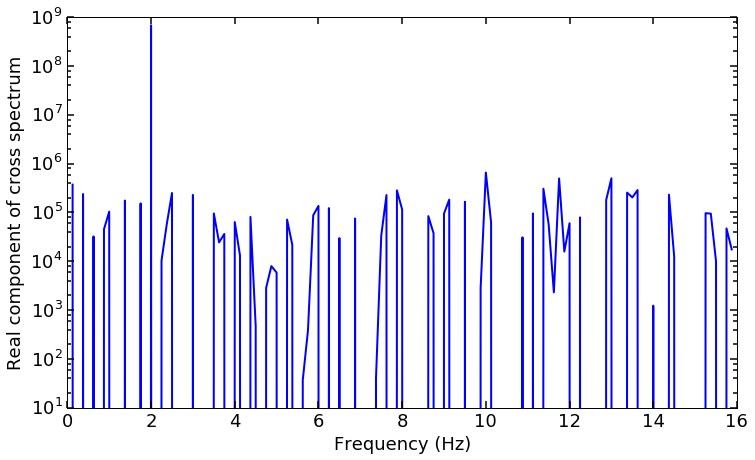

In [78]:
fig, ax = plt.subplots(1,1,figsize=(12,7))
ax.plot(cs.freq, cs.power.real, lw=2, color='blue')
ax.set_xlabel("Frequency (Hz)", fontproperties=font_prop)
ax.set_ylabel("Real component of cross spectrum", fontproperties=font_prop)
ax.set_yscale('log')
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.tick_params(which='major', width=1.5, length=7)
ax.tick_params(which='minor', width=1.5, length=4)
plt.show()


# Averaged cross spectrum example